In [7]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#Standard libraries for data analysis:
from datetime import date, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score,confusion_matrix

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [8]:
#function to summarize na count and percentage
def summarize_na(df: pd.DataFrame) -> pd.DataFrame:
    nan_count = df.isna().sum()
    return pd.DataFrame({'nan_count': nan_count, 
                         'nan_pct': nan_count / len(df) * 100
                         }
                        )[nan_count > 0]

In [9]:
#read in data 
df2 = pd.read_csv('C:\Documents\Anagrafica_ClubQ8.csv', sep = ';', decimal=",")

#df2[['YEAR_JOINED','TIME_JOINED']] = df2.DATA_BATTESIMO.str.split(" ",expand=True,)

#df2 = df2.drop(columns="DATA_BATTESIMO")

#rename columns
df2.columns = ['CUSTOMER_CODE', 'SEX', 'DOB', 'REGION', 'PROVINCE', 'CITY', 'TYPE_OF_CARD','DATA_BATTESIMO' ,'TOTAL_POINTS']

df2

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0
...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0


In [10]:
#count the number of unique customer id's in the database
df2['CUSTOMER_CODE'].nunique()

1656137

In [11]:
check_location = ['REGION', 'PROVINCE', 'CITY']
check_location_isna = df2[check_location].isna()
check_location_isna

,REGION,PROVINCE,CITY
0,False,False,False
1,True,True,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1656132,False,False,False
1656133,False,False,False
1656134,False,False,False
1656135,False,False,False


In [12]:
for col in check_location[1:]:
    if (check_location_isna[check_location[0]] != check_location_isna[col]).any():
        print(False)
        break  # print False and exit as soon as two columns are found to have NaNs in different rows
else:
    print(True)

True


In [13]:
def print_nan_count(series: pd.Series):
    nan_sum = series.isna().sum()
    print(f"Identified {nan_sum} missing values "
          f"({nan_sum/len(series)*100:02.2f}%) "
          f"in '{series.name}'"
         )

In [14]:
print_nan_count(df2['REGION'])

Identified 121809 missing values (7.36%) in 'REGION'


In [15]:
df2_nan_sum = summarize_na(df2)
df2_nan_sum

,nan_count,nan_pct
SEX,1,0.000060
REGION,121809,7.355007
PROVINCE,121809,7.355007
CITY,121809,7.355007
DATA_BATTESIMO,196,0.011835
TOTAL_POINTS,28930,1.746836


In [16]:
#read in the transaction dataset
df3 = pd.read_csv('C:\Documents\Rifornimenti_Carburante_ClubQ8.csv', sep = ';', decimal=",")

#split year and time
df3[['REQUEST_YEAR','REQUEST_TIME']] = df3.DATA_OPERAZIONE.str.split(" ",expand=True,)

#drop original column
df3 = df3.drop(columns="DATA_OPERAZIONE")
#rename columns
df3.columns = ['CUSTOMER_CODE', 'STATION_CODE', 'PRODUCT', 'SALES_MODALITY', 'LITRES', 'LOYALTY_POINTS_AWARDED','REQUEST_YEAR','REQUEST_TIME']

df3

,CUSTOMER_CODE,STATION_CODE,PRODUCT,SALES_MODALITY,LITRES,LOYALTY_POINTS_AWARDED,REQUEST_YEAR,REQUEST_TIME
0,7071161603600606750,584,CARICO GASOLIO,EASY,7,3,2021-03-01,00:00:57
1,7071161603000039982,155,CARICO GASOLIO,SELF,17,17,2021-03-01,00:02:53
2,7071161603000720656,4803,CARICO GASOLIO,OPT,39,19,2021-03-01,00:03:10
3,7071161603014646483,2491,CARICO HIPERFORM DIESEL,SERVITO,54,54,2021-03-01,00:05:45
4,7071161603011692357,8265,CARICO GPL,SERVITO,31,31,2021-03-01,00:07:29
...,...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,CARICO GASOLIO,SELF,50,50,2021-08-31,23:58:22
11787858,7071161603020697769,7064,CARICO BENZINA,EASY,12,6,2021-08-31,23:58:26
11787859,7071161603010864247,7933,CARICO BENZINA,OPT,9,4,2021-08-31,23:58:56
11787860,7071161603601882848,5693,CARICO GASOLIO,SERVITO,50,50,2021-08-31,23:59:03


In [17]:
#create a copy of customer id's to keep the customer id's that are only in the transaction datasets when merging
df3['CUSTOMER_CODE2'] = df3['CUSTOMER_CODE']

In [18]:
#take the two columns with customer id's to merge them with the customer database
df3 = df3[['CUSTOMER_CODE', 'CUSTOMER_CODE2']]

df3

,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787857,7071161603670650324,7071161603670650324
11787858,7071161603020697769,7071161603020697769
11787859,7071161603010864247,7071161603010864247
11787860,7071161603601882848,7071161603601882848


In [19]:
#get a list of unique customer id's that made a transaction
df3 = df3.drop_duplicates()
df3

,CUSTOMER_CODE,CUSTOMER_CODE2
0,7071161603600606750,7071161603600606750
1,7071161603000039982,7071161603000039982
2,7071161603000720656,7071161603000720656
3,7071161603014646483,7071161603014646483
4,7071161603011692357,7071161603011692357
...,...,...
11787602,7071161603601715345,7071161603601715345
11787723,7071161603601882855,7071161603601882855
11787819,7071161603601880743,7071161603601880743
11787824,7071161603601881204,7071161603601881204


In [20]:
#merge the list with customers that made a transaction with the customer database
dfnew = pd.merge(df2, df3, how = 'left')
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,NaN
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,NaN
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18
...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18


In [21]:

#fill na's with 0 to prepare for variable recoding
dfnew['CUSTOMER_CODE2'] = dfnew['CUSTOMER_CODE2'].fillna(0.0)
#create a variable churn that is equal to 1 when the customer has a customer id that is not in the list of customers that made a transaction
dfnew['Churn'] = np.where(dfnew['CUSTOMER_CODE2'] == 0.0, 1, 0)   

dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18,0
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0
...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18,0


In [22]:
#obtain the number of active and inactive customers
print(dfnew.Churn.value_counts())

0    942016
1    714121
Name: Churn, dtype: int64


In [23]:
#calculate the churn rate based on number of active and incactive customers
print(f'The Churn rate = '+ str(round(714121/(714121+942016)*100)) +  '%' )

The Churn rate = 43%


C:\Users\alanr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

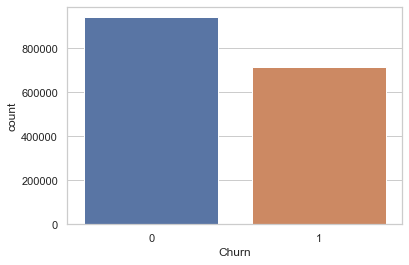

In [24]:
#plot of churn
sns.countplot(dfnew.Churn)

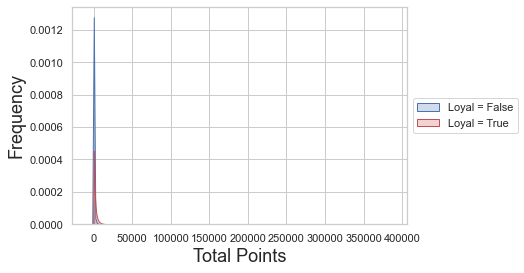

In [25]:
#look at the distribution of active and inactive customers for the numeric variable total points
sns.set_style('whitegrid')
g1 = sns.kdeplot(dfnew[dfnew['Churn'] == 1]['TOTAL_POINTS'], shade=True, color="b", label='Loyal = False')
g1 = sns.kdeplot(dfnew[dfnew['Churn'] == 0]['TOTAL_POINTS'], shade=True, color="r", label='Loyal = True')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Total Points', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [26]:
#look at proportions of churn coming from male and female
t = dfnew.groupby('SEX')[['Churn']].agg('sum')
t/t.sum()

,Churn
SEX,
F,0.337187
M,0.662813


In [27]:
#Compare proportion of total churners that come from each card category
t = dfnew.groupby('TYPE_OF_CARD')[['Churn']].agg('sum')
t/t.sum()

,Churn
TYPE_OF_CARD,
STARQ8_FISICA,0.836650
STARQ8_VIRTUALE,0.156986
STAR_TRUCK,0.006364


In [28]:
#descriptives of our numeric variable total points
dfnew['TOTAL_POINTS'].describe().apply("{0:.5f}".format)


count    1627207.00000
mean        1535.36786
std         2718.68366
min        -7392.00000
25%          158.00000
50%          567.00000
75%         1778.00000
max       386544.00000
Name: TOTAL_POINTS, dtype: object

In [29]:
#check for the average number of total points for active and non active customers
print(dfnew.groupby('Churn')['TOTAL_POINTS'].mean())

Churn
0    2207.061415
1     611.917766
Name: TOTAL_POINTS, dtype: float64


array([[<AxesSubplot:title={'center':'TOTAL_POINTS'}>]], dtype=object)

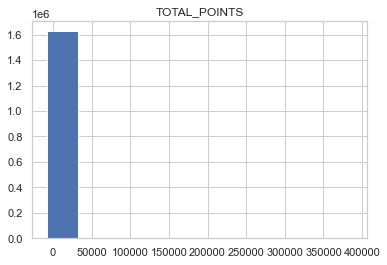

In [30]:
#histogram of total points
dfnew.hist(column='TOTAL_POINTS')

In [31]:
def get_frequencies(series: pd.Series, n_categories: int = None, 
                    bins: int = None, dropna: bool = True
                    ) -> pd.DataFrame:
    """Return a DataFrame displaying the series frequencies.
    
    Parameters
    ----------
    series: pd.Series
        The series for which frequencies are to be computed.
    n_categories: int, optional
        Maximum number of categories to return in output.
        Low-frequency categories will be grouped together to
        reach this threshold.
        
    """
    vc = series.value_counts(ascending=False, 
                             bins=bins, 
                             dropna=dropna
                             )
    if n_categories is not None:
        if not isinstance(n_categories, int) or n_categories <= 0:
            raise TypeError('n_categories should be a strictly positive integer')
        if n_categories < len(vc):
            freq_others = vc.iloc[n_categories - 1:].sum()
            vc = vc.iloc[:n_categories - 1]\
                   .append(pd.Series({'others': freq_others}))
    return pd.DataFrame({'absolute': vc, 
                         'relative': vc / len(series),
                         },
                        index=vc.index
                        )
#proportion of males and females in our database
get_frequencies(dfnew['SEX'], n_categories=5)


,absolute,relative
M,1114651,0.673043
F,541485,0.326957


In [32]:
#proportion for number of clients for each region
get_frequencies(dfnew['REGION'], n_categories=5)

,absolute,relative
LOMBARDIA,240771,0.145381
CAMPANIA,211322,0.127599
SICILIA,201247,0.121516
LAZIO,156526,0.094513
others,724462,0.437441


In [33]:
#proportion for each province where our clients come from
get_frequencies(dfnew['PROVINCE'], n_categories=10)

,absolute,relative
NAPOLI,129514,0.078202
ROMA,128277,0.077456
MILANO,94123,0.056833
TORINO,58020,0.035033
PALERMO,55205,0.033334
FIRENZE,43438,0.026229
CATANIA,37246,0.022490
COSENZA,36275,0.021903
BARI,32841,0.019830
others,919389,0.555141


In [34]:
#proportion for each city where our clients come from
get_frequencies(dfnew['CITY'], n_categories=10)

,absolute,relative
ROMA,99747,0.060229
NAPOLI,80466,0.048587
MILANO,66693,0.040270
TORINO,39952,0.024124
PALERMO,39686,0.023963
FIRENZE,25665,0.015497
CATANIA,25300,0.015277
MESSINA,16295,0.009839
GENOVA,14492,0.008750
others,1126032,0.679915


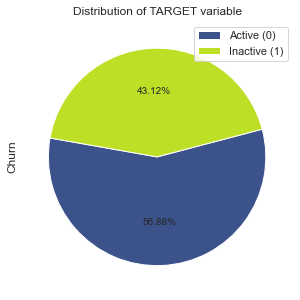

In [35]:
#bar chart to display proportion of active and inactive customers
tmp = dfnew['Churn'].value_counts() / len(dfnew) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title='Distribution of TARGET variable',
              autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(.25), cmap(.9)],
              labels=['Active (0)', 'Inactive (1)'],
              figsize=(5, 5)
              )
plt.show()

In [36]:
#proportion table for different types of cards
get_frequencies(dfnew['TYPE_OF_CARD'], n_categories=10)

,absolute,relative
STARQ8_FISICA,1497919,0.904466
STARQ8_VIRTUALE,148678,0.089774
STAR_TRUCK,9540,0.005760


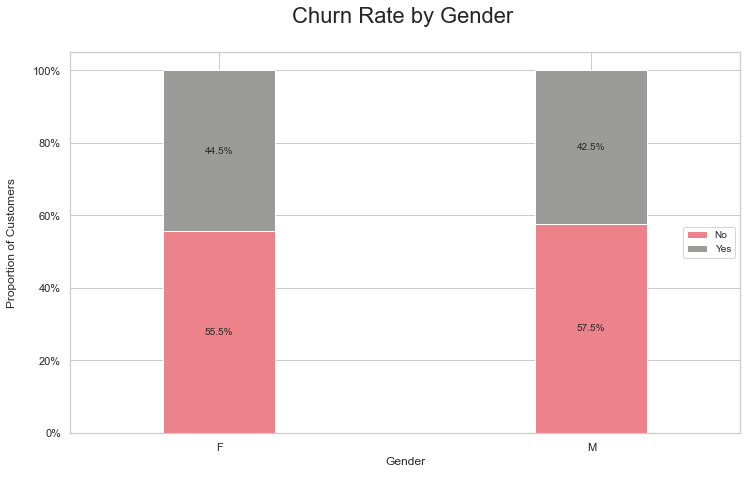

In [37]:
#plot for churn levels for different card types
gender_churn = dfnew.groupby(
['SEX','Churn']).size().unstack()

gender_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Gender\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Gender \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

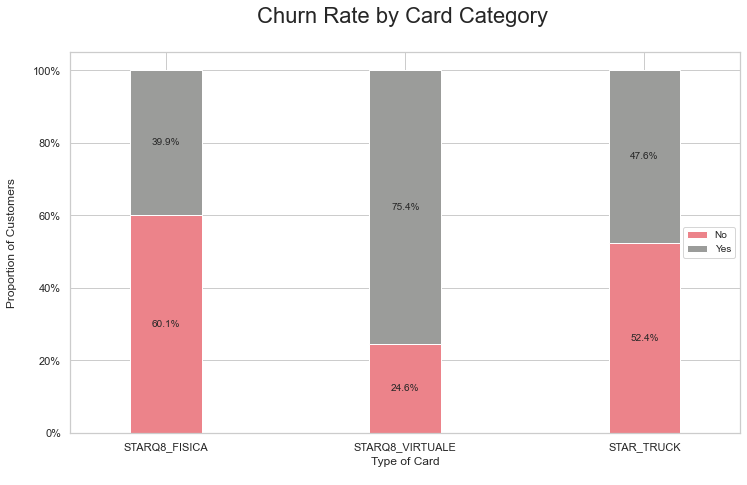

In [38]:
#plot for churn levels for different card types
card_churn = dfnew.groupby(
['TYPE_OF_CARD','Churn']).size().unstack()

card_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (card_churn.T*100.0 / card_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Type of Card\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Card Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='center right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

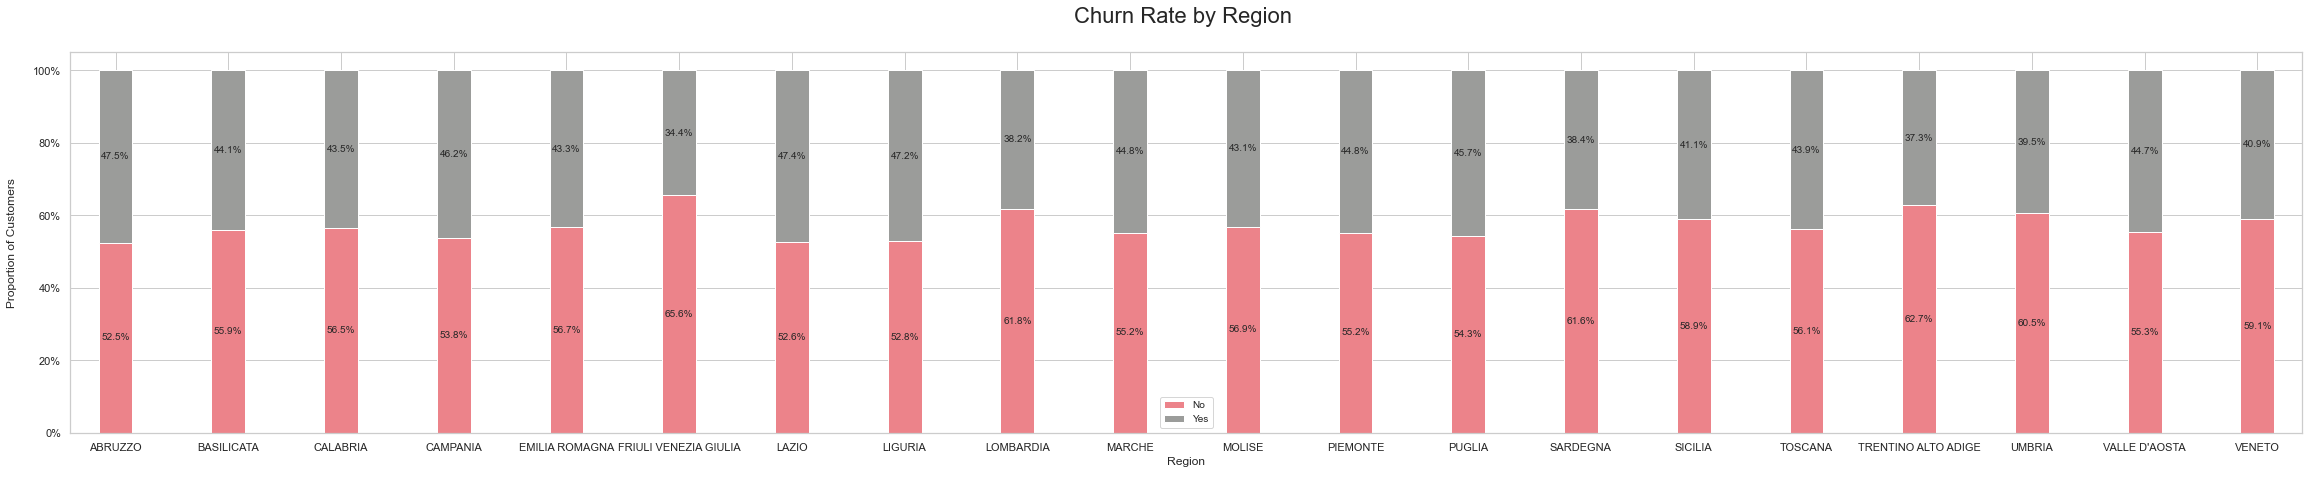

In [39]:
#plot for churn levels for different regions
region_churn = dfnew.groupby(
['REGION','Churn']).size().unstack()

region_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (region_churn.T*100.0 / region_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (40,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Region\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Region \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [40]:
#create a function that computes the age based on comparing the current date with the date of birth
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

#construct a variable that computes the age for each customer
dfnew['Age'] = dfnew['DOB'].apply(age)



In [41]:
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn,Age
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1,70
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18,0,33
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1,78
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0,47
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0,59
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0,54
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0,34
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18,0,37


In [42]:
#create age categories to simplify analysis
dfnew['age_cats'] = pd.cut((dfnew['Age'] ).round(), 
                  bins=10,
                  right=False
                  ).rename('age_categories')


In [43]:
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn,Age,age_cats
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1,70,"[61.5, 73.4)"
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18,0,33,"[25.8, 37.7)"
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1,78,"[73.4, 85.3)"
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0,47,"[37.7, 49.6)"
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0,58,"[49.6, 61.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0,59,"[49.6, 61.5)"
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0,54,"[49.6, 61.5)"
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0,34,"[25.8, 37.7)"
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18,0,37,"[25.8, 37.7)"


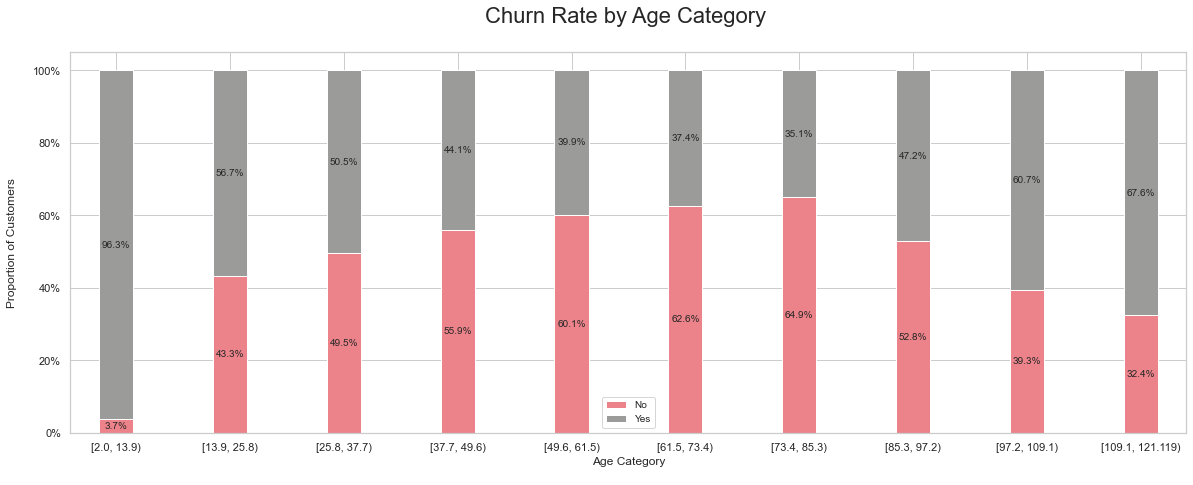

In [44]:
#plot to compare churn levels for different age groups
age_churn = dfnew.groupby(
['age_cats','Churn']).size().unstack()

age_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (age_churn.T*100.0 / age_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (20,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Age Category\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Age Category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [45]:
#proportion of each age category
tab = pd.crosstab(index=dfnew['age_cats'], columns='proportion')
tab/tab.sum()

col_0,proportion
age_cats,
"[2.0, 13.9)",0.000065
"[13.9, 25.8)",0.046014
"[25.8, 37.7)",0.180364
"[37.7, 49.6)",0.271702
"[49.6, 61.5)",0.291775
"[61.5, 73.4)",0.146874
"[73.4, 85.3)",0.057263
"[85.3, 97.2)",0.005809
"[97.2, 109.1)",0.000051


In [46]:

dfnew = dfnew[dfnew['DATA_BATTESIMO'].notna()]
#similar function to before to compute the duration of membership for each customer by subracting the date of joining from the current date
def age(born):
    born = datetime.strptime(str(born), "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
#calculate number of years nad convert to months 
dfnew['Tenure in years'] = dfnew['DATA_BATTESIMO'].apply(age)
dfnew['Tenure in months'] = round(dfnew['Tenure in years']*12)

<ipython-input-46-dbce6bf3a7b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tenure in years'] = dfnew['DATA_BATTESIMO'].apply(age)
<ipython-input-46-dbce6bf3a7b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Tenure in months'] = round(dfnew['Tenure in years']*12)


In [47]:
dfnew

,CUSTOMER_CODE,SEX,DOB,REGION,PROVINCE,CITY,TYPE_OF_CARD,DATA_BATTESIMO,TOTAL_POINTS,CUSTOMER_CODE2,Churn,Age,age_cats,Tenure in years,Tenure in months
0,7071161603018922195,M,1951-09-14 00:00:00,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08 12:32:58,511.0,0.000000e+00,1,70,"[61.5, 73.4)",6,72
1,7071161603005992565,F,1988-09-15 00:00:00,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10 12:22:35,379.0,7.071162e+18,0,33,"[25.8, 37.7)",1,12
2,7071161603025867243,F,1943-09-09 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10 18:07:14,108.0,0.000000e+00,1,78,"[73.4, 85.3)",1,12
3,7071161603021997861,M,1974-03-01 00:00:00,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10 18:08:21,100.0,7.071162e+18,0,47,"[37.7, 49.6)",1,12
4,7071161603025554049,M,1963-11-22 00:00:00,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10 18:09:27,284.0,7.071162e+18,0,58,"[49.6, 61.5)",1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656132,7071161603672630225,F,1962-06-22 00:00:00,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27 18:06:31,2741.0,7.071162e+18,0,59,"[49.6, 61.5)",2,24
1656133,7071161603673015798,M,1967-03-19 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21 08:34:30,8996.0,7.071162e+18,0,54,"[49.6, 61.5)",2,24
1656134,7071161603024035909,M,1987-03-18 00:00:00,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19 09:07:37,424.0,7.071162e+18,0,34,"[25.8, 37.7)",0,0
1656135,7071161603601002132,F,1984-09-20 00:00:00,LOMBARDIA,BRESCIA,ISEO,STARQ8_VIRTUALE,2020-12-15 22:57:21,740.0,7.071162e+18,0,37,"[25.8, 37.7)",1,12


In [48]:
#create tenure categories for different levels of tenure
dfnew['tenure_cats'] = pd.cut((dfnew['Tenure in months'] ).round(), 
                  bins=10,
                  right=False
                  ).rename('tenure_categories')


<ipython-input-48-ab434171410f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['tenure_cats'] = pd.cut((dfnew['Tenure in months'] ).round(),


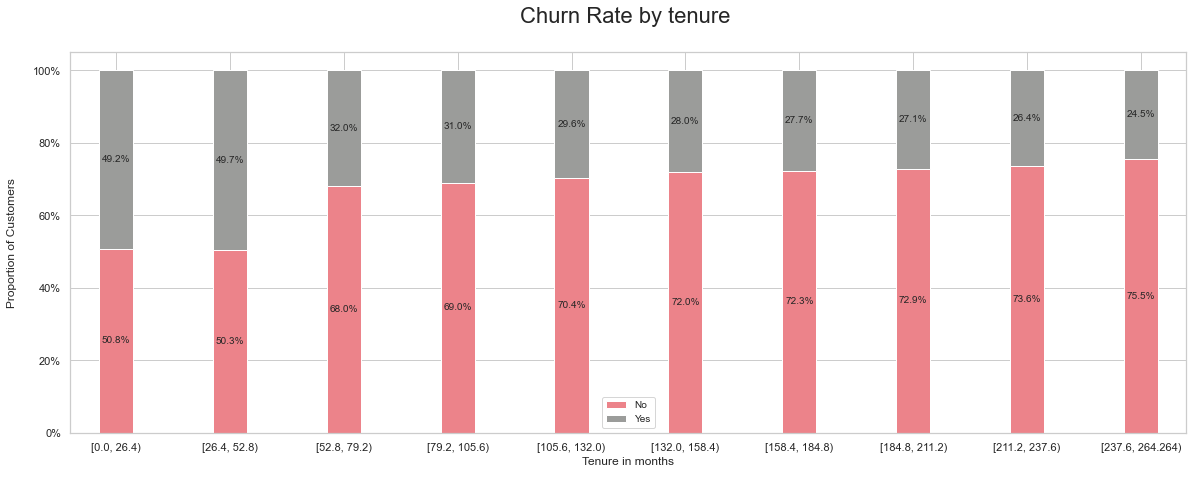

In [49]:
#create ap lot of churn levels for different levels of tenure
tenure_churn = dfnew.groupby(
['tenure_cats','Churn']).size().unstack()

tenure_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (tenure_churn.T*100.0 / tenure_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (20,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Tenure in months\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by tenure \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='best', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [50]:
# Features
X = pd.concat([dfnew['Age'], dfnew['TOTAL_POINTS']], axis=1, keys=['age' ,'points'])
print("Shape of features' set:", X.shape)

# Response (observed number of claims)
y = dfnew['Churn']
print("Shape of response' set:", y.shape)

Shape of features' set: (1655941, 2)
Shape of response' set: (1655941,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [52]:
def poisson_deviance(y, y_pred):
    
    y = np.array(y)
    y_pred = np.array(y_pred)
    
    nlogn = np.empty(y.size)
    dev = np.empty(y.size)
    
    for i in range(y.size):
        if y[i] == 0:
            nlogn[i] = 0
        else:
            nlogn[i] = y[i] * np.log(y[i] / y_pred[i])
            
        dev[i] = 2 * (nlogn[i] - (y[i] - y_pred[i]))
        
    return(dev.sum())

In [53]:
def mean_poisson_deviance(y, y_pred):
    return(poisson_deviance(y, y_pred)/y.size)

In [54]:
global_lambda = y_train.sum() / y_train.size
print("Global claim frequency:", global_lambda)

Global claim frequency: 0.43113050593620544


In [ ]:
# Prediction
y_pred_train = np.repeat(global_lambda, y_train.size)
y_pred_test = np.repeat(global_lambda, y_test.size)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
dt = tree.DecisionTreeRegressor(criterion = 'mse', min_samples_leaf = 6000, random_state = 2020)

In [ ]:
# Starting time
start = time.time()

# Training
dt.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, feature_names = list(X_train), filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
# Prediction
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
num_k_fold = 5
kf = KFold(shuffle = True, n_splits = num_k_fold)

In [ ]:
scores = pd.DataFrame(columns = ['Mean Deviance (testing)', 'Mean Deviance (training)'],
                      data = np.zeros((num_k_fold, 2)))

In [ ]:
# For log
i = 0

# Cross-validation
for train, test in kf.split(X_train):
    # Select training and testing subsets
    X_train_cv, y_train_cv = X_train.iloc[train], y_train.iloc[train]
    X_test_cv, y_test_cv = X_train.iloc[test], y_train.iloc[test]
    
    # Training
    dt = tree.DecisionTreeRegressor(criterion = "mse", min_samples_leaf = 200, random_state = 2020)
    dt.fit(X_train_cv, y_train_cv)
    
    # Prediction
    y_pred_train = dt.predict(X_train_cv)
    y_pred_test = dt.predict(X_test_cv)

    # Metrics
    scores.at[i, 'Mean Deviance (testing)'] = mean_poisson_deviance(y_test_cv, y_pred_test)
    scores.at[i, 'Mean Deviance (training)'] = mean_poisson_deviance(y_train_cv, y_pred_train)
    
    # Log
    i = i + 1
    print('Fold number', i, 'completed...')

In [ ]:
scores

In [ ]:
scores.describe()

In [ ]:
min_sample_per_leaf = np.arange(start = 200, stop = 901, step = 100)
min_sample_per_leaf

In [ ]:
num_k_fold = 10

In [ ]:
scores = pd.DataFrame(columns = ['Min samples per leaf', 'Mean Deviance (testing)', 'Mean Deviance (training)'],
                      data = np.zeros((num_k_fold * len(min_sample_per_leaf), 3)))

In [ ]:
# Starting time
start_global = time.time()

# Loop over the number of minimum number of samples per leaf
for j in range(len(min_sample_per_leaf)):
    i = 0
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected minimum number of samples per leaf
    for train, test in kf.split(X_train):
        # Select training and testing subsets
        X_train_cv, y_train_cv = X_train.iloc[train], y_train.iloc[train]
        X_test_cv, y_test_cv = X_train.iloc[test], y_train.iloc[test]
        
        # Training
        dt = tree.DecisionTreeRegressor(criterion = "mse", min_samples_leaf = min_sample_per_leaf[j], random_state = 2020)
        dt.fit(X_train_cv, y_train_cv)
        
        # Prediction
        y_pred_train = dt.predict(X_train_cv)
        y_pred_test = dt.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'Min samples per leaf'] = min_sample_per_leaf[j]
        scores.at[index, 'Mean Deviance (testing)'] = mean_poisson_deviance(y_test_cv, y_pred_test)
        scores.at[index, 'Mean Deviance (training)'] = mean_poisson_deviance(y_train_cv, y_pred_train)
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

In [ ]:
gp = scores.groupby('Min samples per leaf')
means = gp.mean()

In [ ]:
measures = ['Mean Deviance (testing)','Mean Deviance (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

In [ ]:
dt = tree.DecisionTreeRegressor(criterion = 'mse', min_samples_leaf = 500, random_state = 2020)

In [ ]:
# Starting time
start = time.time()

# Training
dt.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, feature_names = list(X_train), filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
# Prediction
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
# Features' names
features = list(X_train)

# Importance measures
importances = dt.feature_importances_

# Get the indices of the features with highest importance
indices = np.flip(np.argsort(importances))

# Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [ ]:
# Relative importance of the second most important feature (the age)
importances[indices[1]] / importances[indices[0]]

In [ ]:
plot_partial_dependence(dt, X_train, [0], method = "brute")

In [ ]:
plot_partial_dependence(dt, X_train, [1], method = "brute")

In [ ]:
plot_partial_dependence(dt, X_train, [(0, 1)], method = "brute")

In [ ]:
def plot_3d_partial_dependence(model, X_train):
    fig = plt.figure()
    target_feature = (0, 1)
    names = ["Age", "Power"]
    pdp, axes = partial_dependence(model, X_train, target_feature, grid_resolution = 100, method = "brute")
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T
    ax = Axes3D(fig)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.viridis)
    ax.set_xlabel(names[target_feature[0]])
    ax.set_ylabel(names[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    ax.view_init(elev=20, azim=230)
    plt.colorbar(surf)
    plt.show()

In [ ]:
plot_3d_partial_dependence(dt, X_train)

In [ ]:
rf = ensemble.RandomForestRegressor(criterion = "mse", n_estimators = 20,
                                    min_samples_leaf = 200, random_state = 2020)

In [ ]:
# Starting time
start = time.time()

# Training
rf.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
# Prediction
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
min_sample_per_leaf = np.arange(start = 100, stop = 701, step = 50)
min_sample_per_leaf

In [ ]:
num_k_fold = 10

In [ ]:
scores = pd.DataFrame(columns = ['Min samples per leaf', 'Mean Deviance (testing)', 'Mean Deviance (training)'],
                      data = np.zeros((num_k_fold * len(min_sample_per_leaf), 3)))
scores.head()

In [ ]:
# Starting time
start_global = time.time()

# Loop over the number of minimum number of samples per leaf
for j in range(len(min_sample_per_leaf)):
    i = 0
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected minimum number of samples per leaf
    for train, test in kf.split(X_train):
        # Select training and testing subsets
        X_train_cv, y_train_cv = X_train.iloc[train], y_train.iloc[train]
        X_test_cv, y_test_cv = X_train.iloc[test], y_train.iloc[test]
        
        # Training
        rf = ensemble.RandomForestRegressor(criterion = "mse", n_estimators = 20,
                                            min_samples_leaf = min_sample_per_leaf[j], random_state = 2020)
        
        rf.fit(X_train_cv, y_train_cv)
        
        # Prediction
        y_pred_train = rf.predict(X_train_cv)
        y_pred_test = rf.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'Min samples per leaf'] = min_sample_per_leaf[j]
        scores.at[index, 'Mean Deviance (testing)'] = mean_poisson_deviance(y_test_cv, y_pred_test)
        scores.at[index, 'Mean Deviance (training)'] = mean_poisson_deviance(y_train_cv, y_pred_train)
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

In [ ]:
gp = scores.groupby('Min samples per leaf')
means = gp.mean()

In [ ]:
measures = ['Mean Deviance (testing)','Mean Deviance (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

In [ ]:
rf = ensemble.RandomForestRegressor(criterion = "mse", n_estimators = 20,
                                    min_samples_leaf = 550, random_state = 2020)

In [ ]:
# Starting time
start = time.time()

# Training
rf.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
# Prediction
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
# Features' names
features = list(X_train)

# Importance measures
importances = rf.feature_importances_

# Get the indices of the features with highest importance
indices = np.flip(np.argsort(importances))

# Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [ ]:
# Relative importance of the second most important feature (the age)
importances[indices[1]] / importances[indices[0]]

In [ ]:
plot_partial_dependence(rf, X_train, [0], method = "brute")

In [ ]:
plot_partial_dependence(rf, X_train, [1], method = "brute")

In [ ]:
plot_partial_dependence(rf, X_train, [(0, 1)], method = "brute")

In [ ]:
plot_3d_partial_dependence(rf, X_train)

In [ ]:
gbm = ensemble.GradientBoostingRegressor(loss = 'ls', criterion = "mse", learning_rate = 0.3,
                                         n_estimators = 40, min_samples_leaf = 300,
                                         random_state = 2020, verbose = 1)

In [ ]:
# Starting time
start = time.time()

# Training
gbm.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
# Prediction
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
num_trees = np.arange(1, 31, 1)
num_trees

In [ ]:
num_k_fold = 10

In [ ]:
scores = pd.DataFrame(columns = ['Number of trees', 'Mean Deviance (testing)', 'Mean Deviance (training)'],
                      data = np.zeros((num_k_fold * len(num_trees), 3)))
scores.head()

In [ ]:
# Starting time
start_global = time.time()

# Loop over the number of minimum number of samples per leaf
for j in range(len(num_trees)):
    i = 0
    
    # Initiate k-fold object
    kf = KFold(n_splits = num_k_fold, shuffle = True)
    
    # Record starting time
    start = time.time()
    
    # k-fold cross-validation for the selected minimum number of samples per leaf
    for train, test in kf.split(X_train):
        # Select training and testing subsets
        X_train_cv, y_train_cv = X_train.iloc[train], y_train.iloc[train]
        X_test_cv, y_test_cv = X_train.iloc[test], y_train.iloc[test]
        
        # Training
        gbm = ensemble.GradientBoostingRegressor(loss = 'ls', criterion = "mse", min_samples_leaf = 300,
                                                 learning_rate = 0.3, n_estimators = num_trees[j],
                                                 random_state = 2020)
        
        gbm.fit(X_train_cv, y_train_cv)
        
        # Prediction
        y_pred_train = gbm.predict(X_train_cv)
        y_pred_test = gbm.predict(X_test_cv)

        # Metrics
        index = j * num_k_fold + i
        scores.at[index, 'Number of trees'] = num_trees[j]
        scores.at[index, 'Mean Deviance (testing)'] = mean_poisson_deviance(y_test_cv, y_pred_test)
        scores.at[index, 'Mean Deviance (training)'] = mean_poisson_deviance(y_train_cv, y_pred_train)
        i = i + 1
    
    # Elasped time for the k-fold step
    end = time.time()
    elapsed = end - start
    print('Step', j + 1, 'completed (', elapsed, 'sec)...')

# Global elapsed time
end_global = time.time()
elapsed = end_global - start_global
print('Total time:', elapsed, 'sec!')

In [ ]:
gp = scores.groupby('Number of trees')
means = gp.mean()

In [ ]:
measures = ['Mean Deviance (testing)','Mean Deviance (training)']
plt.figure()
plt.plot(means[measures])
plt.legend(measures)
plt.show()

In [ ]:
gbm = ensemble.GradientBoostingRegressor(loss = 'ls', criterion = "mse", learning_rate = 0.3,
                                         n_estimators = 10, min_samples_leaf = 300,
                                         random_state = 2020, verbose = 1)

In [ ]:
# Starting time
start = time.time()

# Training
gbm.fit(X_train, y_train)

# Elapsed time
end = time.time()
print("Seconds elapsed:", end - start)

In [ ]:
# Prediction
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

# Metrics
print("Mean Poisson deviance on training set:", mean_poisson_deviance(y_train, y_pred_train))
print("Mean Poisson deviance on testing set:", mean_poisson_deviance(y_test, y_pred_test))

In [ ]:
# Features' names
features = list(X_train)

# Importance measures
importances = gbm.feature_importances_

# Get the indices of the features with highest importance
indices = np.flip(np.argsort(importances))

# Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [ ]:
# Relative importance of the second most important feature (the age)
importances[indices[1]] / importances[indices[0]]

In [ ]:
plot_partial_dependence(gbm, X_train, [0], method = "brute")

In [ ]:
plot_partial_dependence(gbm, X_train, [1], method = "brute")

In [55]:
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').